In [29]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/company-stock-movements-2010-2015.csv')
df.head()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [6]:
df.isna().sum()

Unnamed: 0    0
2010-01-04    0
2010-01-05    0
2010-01-06    0
2010-01-07    0
             ..
2013-10-23    0
2013-10-24    0
2013-10-25    0
2013-10-28    0
2013-10-29    0
Length: 964, dtype: int64

In [12]:
companies = df.iloc[:, 0]
companies = np.array(companies)
companies

array(['Apple', 'AIG', 'Amazon', 'American express', 'Boeing',
       'Bank of America', 'British American Tobacco', 'Canon',
       'Caterpillar', 'Colgate-Palmolive', 'ConocoPhillips', 'Cisco',
       'Chevron', 'DuPont de Nemours', 'Dell', 'Ford',
       'General Electrics', 'Google/Alphabet', 'Goldman Sachs',
       'GlaxoSmithKline', 'Home Depot', 'Honda', 'HP', 'IBM', 'Intel',
       'Johnson & Johnson', 'JPMorgan Chase', 'Kimberly-Clark',
       'Coca Cola', 'Lookheed Martin', 'MasterCard', 'McDonalds', '3M',
       'Microsoft', 'Mitsubishi', 'Navistar', 'Northrop Grumman',
       'Novartis', 'Pepsi', 'Pfizer', 'Procter Gamble', 'Philip Morris',
       'Royal Dutch Shell', 'SAP', 'Schlumberger', 'Sony',
       'Sanofi-Aventis', 'Symantec', 'Toyota', 'Total',
       'Taiwan Semiconductor Manufacturing', 'Texas instruments',
       'Unilever', 'Valero Energy', 'Walgreen', 'Wells Fargo', 'Wal-Mart',
       'Exxon', 'Xerox', 'Yahoo'], dtype=object)

In [14]:
movements = df.iloc[:, 1:]
movements = np.array(movements)
movements

array([[ 5.8000000e-01, -2.2000500e-01, -3.4099980e+00, ...,
        -5.3599620e+00,  8.4001900e-01, -1.9589981e+01],
       [-6.4000200e-01, -6.5000000e-01, -2.1000100e-01, ...,
        -4.0001000e-02, -4.0000200e-01,  6.6000000e-01],
       [-2.3500060e+00,  1.2600090e+00, -2.3500060e+00, ...,
         4.7900090e+00, -1.7600090e+00,  3.7400210e+00],
       ...,
       [ 4.3000100e-01,  2.2999600e-01,  5.7000000e-01, ...,
        -2.6000200e-01,  4.0000100e-01,  4.8000300e-01],
       [ 9.0000000e-02,  1.0000000e-02, -8.0000000e-02, ...,
        -3.0000000e-02,  2.0000000e-02, -3.0000000e-02],
       [ 1.5999900e-01,  1.0001000e-02,  0.0000000e+00, ...,
        -6.0001000e-02,  2.5999800e-01,  9.9998000e-02]])

In [15]:
normalized_movements = normalize(movements)
normalized_movements

array([[ 0.00302051, -0.00114574, -0.01775851, ..., -0.02791349,
         0.00437463, -0.10202026],
       [-0.02599391, -0.02639998, -0.00852927, ..., -0.00162466,
        -0.01624623,  0.02680614],
       [-0.02208986,  0.01184398, -0.02208986, ...,  0.04502568,
        -0.01654394,  0.03515588],
       ...,
       [ 0.01981027,  0.01059598,  0.02626006, ..., -0.01197837,
         0.01842816,  0.02211388],
       [ 0.0200991 ,  0.00223323, -0.01786587, ..., -0.0066997 ,
         0.00446647, -0.0066997 ],
       [ 0.01796837,  0.00112314,  0.        , ..., -0.00673829,
         0.02919855,  0.01123007]])

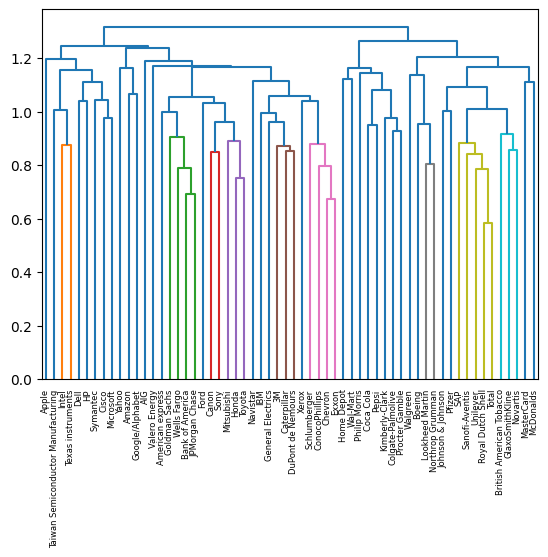

In [17]:
mergings = linkage(normalized_movements, method='complete')

dendrogram(mergings,
           labels=companies,
           leaf_rotation=90,
           leaf_font_size=6)

plt.show()

In [25]:
labels = fcluster(mergings, 1, criterion='distance')
labels

array([ 7, 19,  8, 11, 25, 11, 30, 12, 14, 23, 15,  5, 15, 14,  3, 13, 14,
        9, 11, 30, 20, 12,  4, 14,  1, 27, 11, 23, 22, 25, 31, 32, 14,  5,
       12, 17, 25, 30, 22, 28, 23, 24, 29, 29, 15, 12, 29,  6, 12, 29,  2,
        1, 29, 18, 26, 11, 21, 15, 16, 10], dtype=int32)

In [26]:
pairs = pd.DataFrame({'labels': labels, 'companies': companies})
pairs.sort_values('labels')

,labels,companies
51,1,Texas instruments
24,1,Intel
50,2,Taiwan Semiconductor Manufacturing
14,3,Dell
22,4,HP
33,5,Microsoft
11,5,Cisco
47,6,Symantec
0,7,Apple
2,8,Amazon


In [28]:
ct = pd.crosstab(pairs['labels'], pairs['companies'])
ct

companies,3M,AIG,Amazon,American express,Apple,Bank of America,Boeing,British American Tobacco,Canon,Caterpillar,...,Texas instruments,Total,Toyota,Unilever,Valero Energy,Wal-Mart,Walgreen,Wells Fargo,Xerox,Yahoo
labels,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


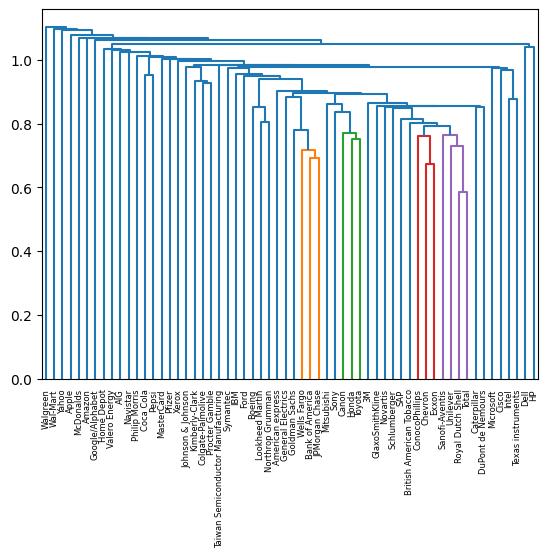

In [27]:
mergings = linkage(normalized_movements, method='single')

dendrogram(mergings,
           labels=companies,
           leaf_rotation=90,
           leaf_font_size=6)

plt.show()

### TSNE

C:\Users\USER\Documents\projects\data\internship\task\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


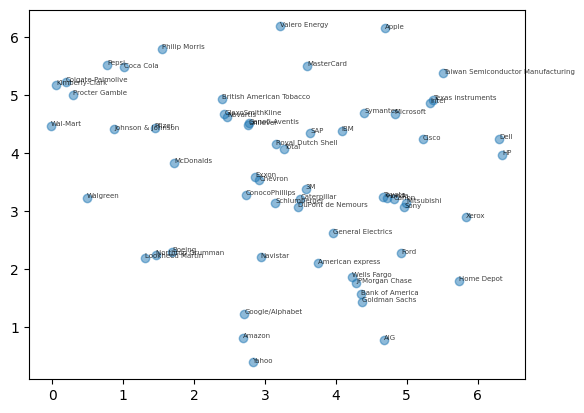

In [31]:
tsne = TSNE(learning_rate=50)
transformed = tsne.fit_transform(normalized_movements)

xs = transformed[:, 0]
ys = transformed[:, 1]

plt.scatter(xs, ys, alpha=0.5)
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
    
plt.show()